In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

**Question - 1:**
Create a random 2-D numpy array with 1500 values. Simulate different
lines of fit using 1000 values from the array and find the errors for each of
these lines. Find the line with the least error among these lines and store
it as the line of best fit. Using this line of best fit, predict the target variable
for the other 500 values.

In [ ]:
#generate 1500 random values
np.random.seed(0)
data=np.random.rand(1500,2)

In [ ]:
df=pd.DataFrame(data,columns=['feature1','feature2'])
X=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values
#x=df.iloc[:,0].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=52)

In [ ]:
#calculate m and c
def calculate(X,y):
  x_mean=np.mean(X)
  y_mean=np.mean(y)

  m=np.sum((X * y) - (y_mean * X)) / np.sum((X**2) - (x_mean * X))
  c=y_mean-m*x_mean

  return m,c

In [ ]:
#List of errors and models [m,c]
error=[]
models=[]

for _ in range(1000):

  random_index=np.random.choice(len(X_train),size=1000,replace=False)
  X_sample=X_train[random_index]
  y_sample=y_train[random_index]

  m,c=calculate(X_sample,y_sample)
  y_pred=m*X_test+c

  mse=np.sum((y_pred-y_test)**2)
  rmse=np.sqrt(mse)

  error.append(mse)
  models.append([m,c])

In [ ]:
best_fit_index=np.argmin(error)
best_m,best_c=models[best_fit_index]

print(f"Best m: {best_m}")
print(f"Best c: {best_c}")

y_pred_best=best_m*X_test+best_c
#print(f"Best pred value: {y_pred_best}")

Best m: -2.6189833201445223e-13
Best c: 0.5007562612698488


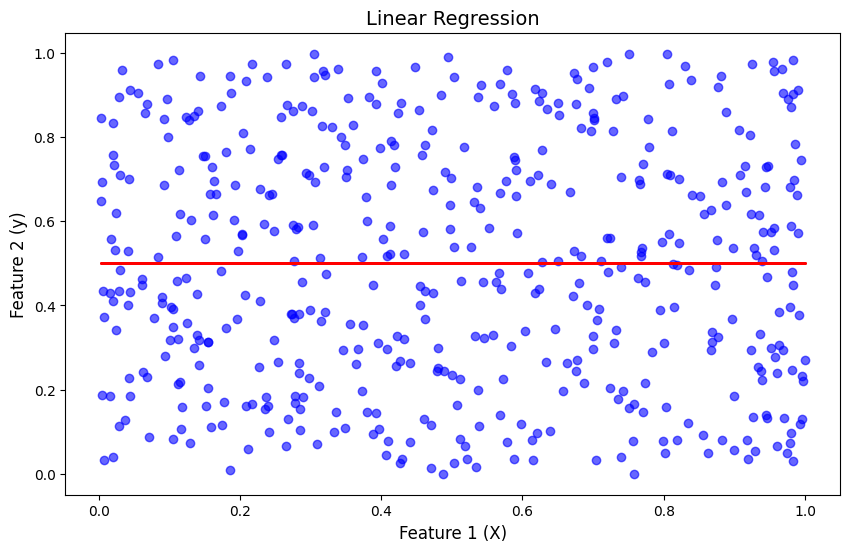

In [ ]:
#Plot

plt.figure(figsize=(10,6))

plt.scatter(X_test,y_test,color='blue',label='Test data',alpha=0.6)

plt.plot(X_test,y_pred_best,color='red',label=f"Best Fit Line: y={best_m:.2f}x+{best_c:.2f}",linewidth=2)

plt.xlabel('Feature 1 (X)',fontsize=12)
plt.ylabel('Feature 2 (y)',fontsize=12)
plt.title('Linear Regression',fontsize=14)
plt.show()

**Question - 2:** Use the data1.csv to build a simple linear regression from scratch without
using sklearn libraries and print the RMSE and mean absolute error values.
Use both the equations available in the slides (in theory page) to build the
model and compare the intercept and coefficient values

In [ ]:
# Load dataset
data = pd.read_csv('data1.csv')

# Split data into features and target
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=52)

In [ ]:
def calculate(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)

    # Numerator and denominator for slope
    m = np.sum((X.flatten() * y) - (y_mean * X.flatten())) / np.sum((X.flatten() ** 2) - (x_mean * X.flatten()))
    c = y_mean - m * x_mean

    return m, c

In [ ]:
n = len(X_train)

# Initialize errors and models lists
errors = []
models = []

for _ in range(n):
    # Generate random indices for bootstrapping
    random_index = np.random.choice(n, size=n, replace=True)
    X_sample = X_train[random_index]
    y_sample = y_train[random_index]

    # Calculate slope and intercept
    m, c = calculate(X_sample, y_sample)

    # Predict values for the test set
    y_pred = m * X_test.flatten() + c

    # Calculate RMSE and MAE
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    mae = np.mean(np.abs(y_pred - y_test))

    # Append errors and model parameters
    errors.append([rmse, mae])
    models.append([m, c])

In [ ]:
# Find the best model (minimum RMSE)
best_fit_index = np.argmin([error[0] for error in errors])
best_m, best_c = models[best_fit_index]

# Print best slope and intercept
print(f"Best m: {best_m}")
print(f"Best c: {best_c}")

# Predict using the best model
y_pred_best = best_m * X_test.flatten() + best_c

Best m: 3.2687050017444417
Best c: 27.92660725046757


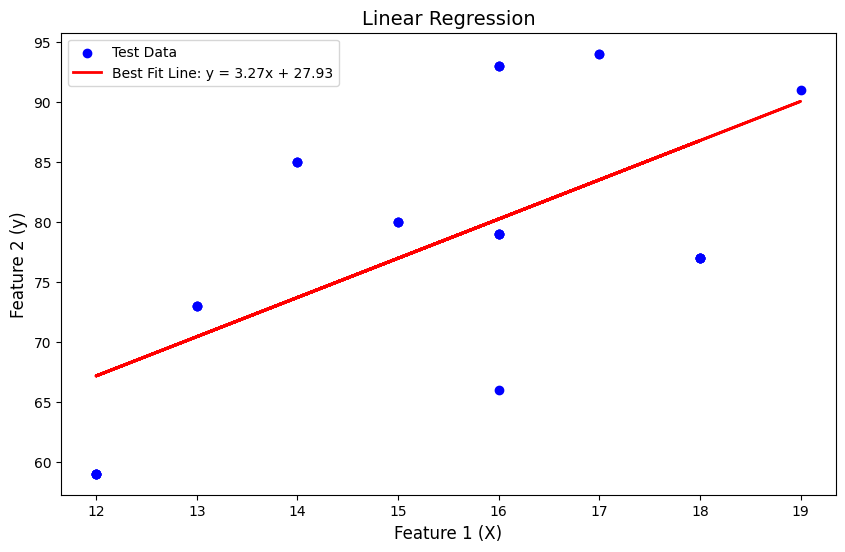

In [ ]:
#Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred_best, color='red', label=f"Best Fit Line: y = {best_m:.2f}x + {best_c:.2f}", linewidth=2)
plt.xlabel('Feature 1 (X)', fontsize=12)
plt.ylabel('Feature 2 (y)', fontsize=12)
plt.title('Linear Regression', fontsize=14)
plt.legend()
plt.show()